# Install Library

In [ ]:
# Install library
!pip install -q ydata-profiling scikit-learn matplotlib seaborn openpyxl

# Mengimpor dan unduh dataset

In [ ]:
# Import library dan unduh dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Link dataset
DATA_URL = "https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv"

# Unduh file dan muat ke DataFrame
csv_path = "used_cars_price_fiks.csv"
if not os.path.exists(csv_path):
    !wget -q -O {csv_path} {DATA_URL}

df = pd.read_csv(csv_path)
print("Dataset berhasil dimuat. Ukuran:", df.shape)

Dataset berhasil dimuat. Ukuran: (6019, 13)


# Profiling dan Preprocessing Data

Profiling data

In [ ]:
print("INFO DATA")
print(df.info())
print("\nDESKRIPSI DATA")
print(df.describe())
print("\nCEK MISSING VALUE")
print(df.isnull().sum())

INFO DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB
None

DESKRIPSI DATA
        Unnamed: 0         Year  Kilometers_Driven      Mileage       Engine  

Preprocessing data

Jumlah data setelah cleaning: 5582 baris

Tipe Data Setiap Kolom:
float64    6
object     5
int64      1
Name: count, dtype: int64


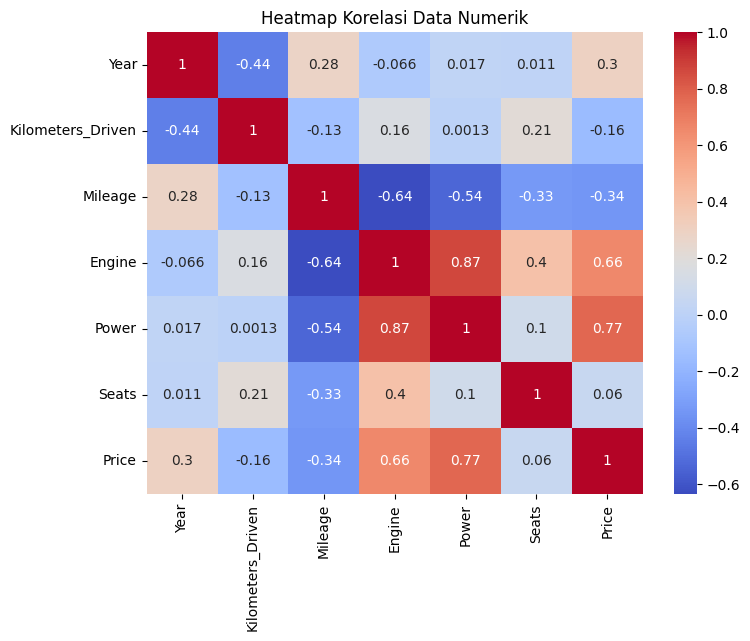

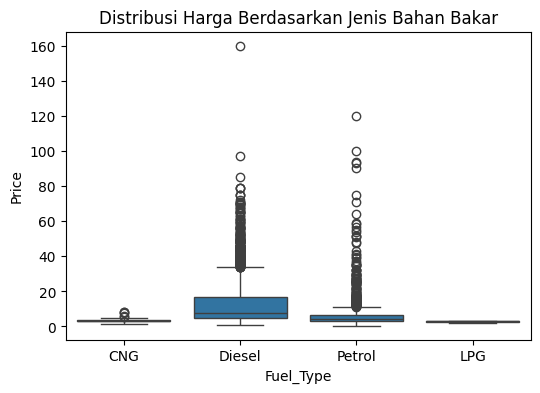

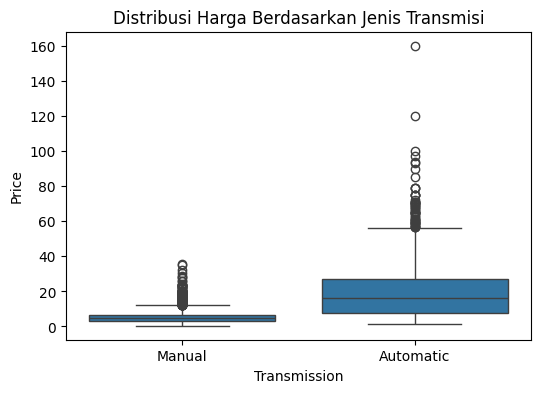


Kolom kategorikal yang akan di-encode: ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

Data setelah transformasi:
   Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0  2010            72000.0    26.60   998.0   58.16    5.0   1.75   
1  2015            41000.0    19.67  1582.0  126.20    5.0  12.50   
2  2011            46000.0    18.20  1199.0   88.70    5.0   4.50   
3  2012            87000.0    20.77  1248.0   88.76    7.0   6.00   
4  2013            40670.0    15.20  1968.0  140.80    5.0  17.74   

   Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0                           False                        False   
1                           False                        False   
2                           False                        False   
3                           False                        False   
4                           False                        False   

   Name_Audi A3 35 TDI Premium Plus  ...  Location_Kolka

In [ ]:
# Data Cleaning
# Hapus kolom Unnamed: 0
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Hapus missing value
df = df.dropna()
print(f"Jumlah data setelah cleaning: {len(df)} baris")

# Analisis Awal Kolom
print("\nTipe Data Setiap Kolom:")
print(df.dtypes.value_counts())

# Exploratory Data Analysis (EDA)
# Heatmap untuk data numerik
num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
num_df = df[num_cols]

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Data Numerik")
plt.show()

# Boxplot untuk data kategorikal penting
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Distribusi Harga Berdasarkan Jenis Bahan Bakar')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Distribusi Harga Berdasarkan Jenis Transmisi')
plt.show()

# Data Transformation
# Cek kolom kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
print("\nKolom kategorikal yang akan di-encode:", list(cat_cols))

# Encoding variabel kategorikal
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Data Final (cek hasil transformasi)
print("\nData setelah transformasi:")
print(df.head())

# Korelasi fitur hasil encoding terhadap Price
corr = df.corr(numeric_only=True)['Price'].sort_values(ascending=False)
print("\n10 Data dengan Korelasi Tertinggi terhadap Harga Mobil:")
print(corr.head(10))


# Modeling, split data dan data scaling

In [ ]:
# Split Data
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)
print("Model Linear Regression berhasil dilatih dan siap digunakan untuk prediksi")

Model Linear Regression berhasil dilatih dan siap digunakan untuk prediksi


# Evaluasi dan visualisasi

In [ ]:
# Evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Hasil Evaluasi Model Linear Regression")
print(f"R2 Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"MSE      : {mse:.4f}")
print(f"RMSE     : {rmse:.4f}")

Hasil Evaluasi Model Linear Regression
R2 Score : 0.6646
MAE      : 3.3650
MSE      : 41.0934
RMSE     : 6.4104


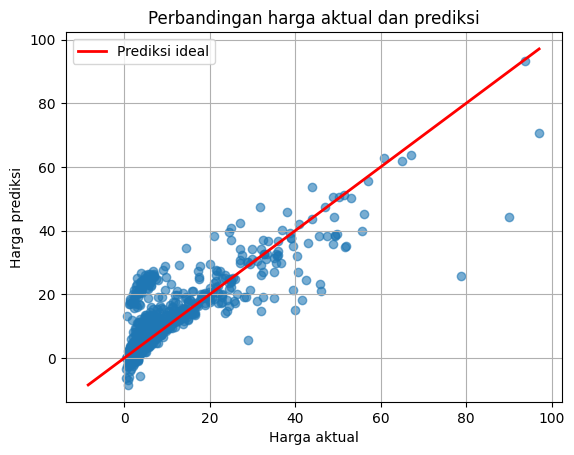

In [ ]:
# Visualisasi: Scatter Plot Prediksi vs Aktual
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Harga aktual")
plt.ylabel("Harga prediksi")
plt.title("Perbandingan harga aktual dan prediksi")
plt.grid(True)

# Tambah garis ideal
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Prediksi ideal')

plt.legend()
plt.show()
